# Investigating Coupling in Optical Ring Resonators
MIT 6.S976: Silicon Photonics HW7. Written by Shoumik Chowdhury (@shoumikdc)

In [53]:
""" Import Relevant Packages """
import numpy as np
import h5py
import matplotlib.pyplot as plt

""" Useful Constants"""
π = np.pi; nm = 1; μm = 1000; # base unit is nm here

In [4]:
def transmission(ϕ, t, loss):
    """
    Args:
        ϕ: Round-trip phase = jβL
        t: Transmission through coupling port
        loss: exp(-αL/2), with loss α and length L
    """
    return (t - loss * np.exp(1j * ϕ)) / (1 - t * loss * np.exp(1j * ϕ))

### Critical Coupling: $t = e^{-\alpha L / 2}$

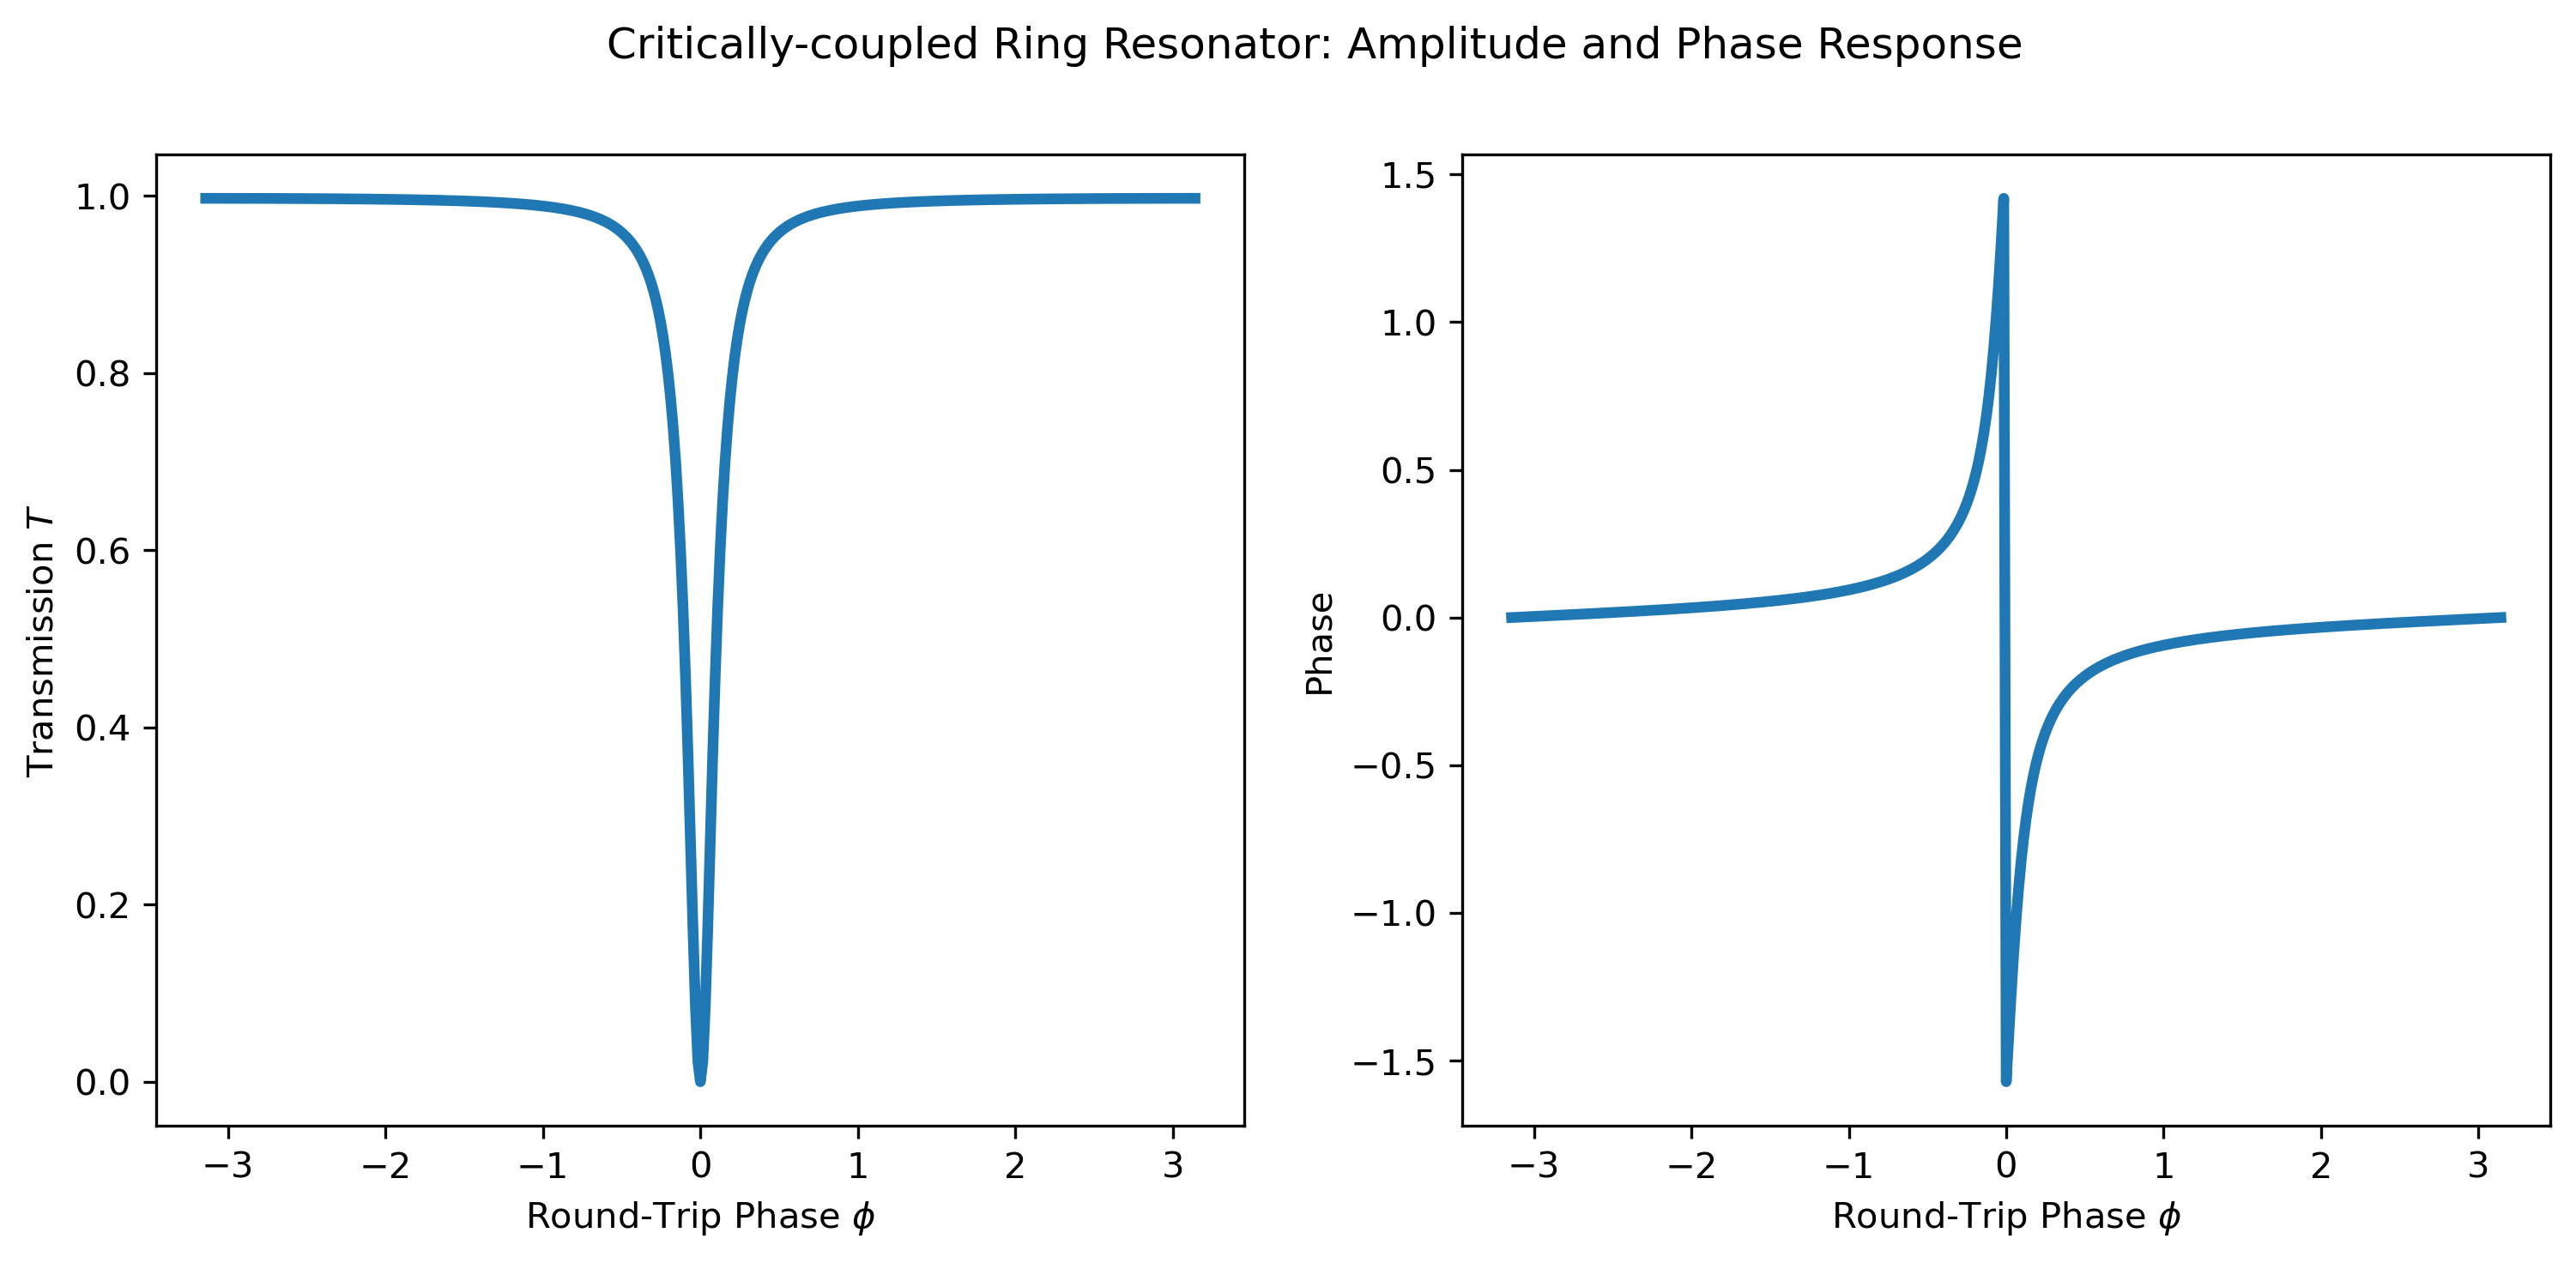

In [111]:
t = loss = 0.95

ϕ_list = np.linspace(-π, π, 401)
T = transmission(ϕ_list, t, loss)

fig, ax = plt.subplots(1, 2, figsize = (12, 5), dpi=300)

ax[0].plot(ϕ_list, np.abs(T)**2, '-', linewidth=3)
ax[1].plot(ϕ_list, np.angle(T), '-', linewidth=3)

ax[0].set_xlabel(r"Round-Trip Phase $\phi$")
ax[1].set_xlabel(r"Round-Trip Phase $\phi$")
ax[0].set_ylabel(r"Transmission $T$")
ax[1].set_ylabel(r"Phase")

fig.suptitle("Critically-coupled Ring Resonator: Amplitude and Phase Response");

### Overcoupling: $t < e^{-\alpha L / 2}$

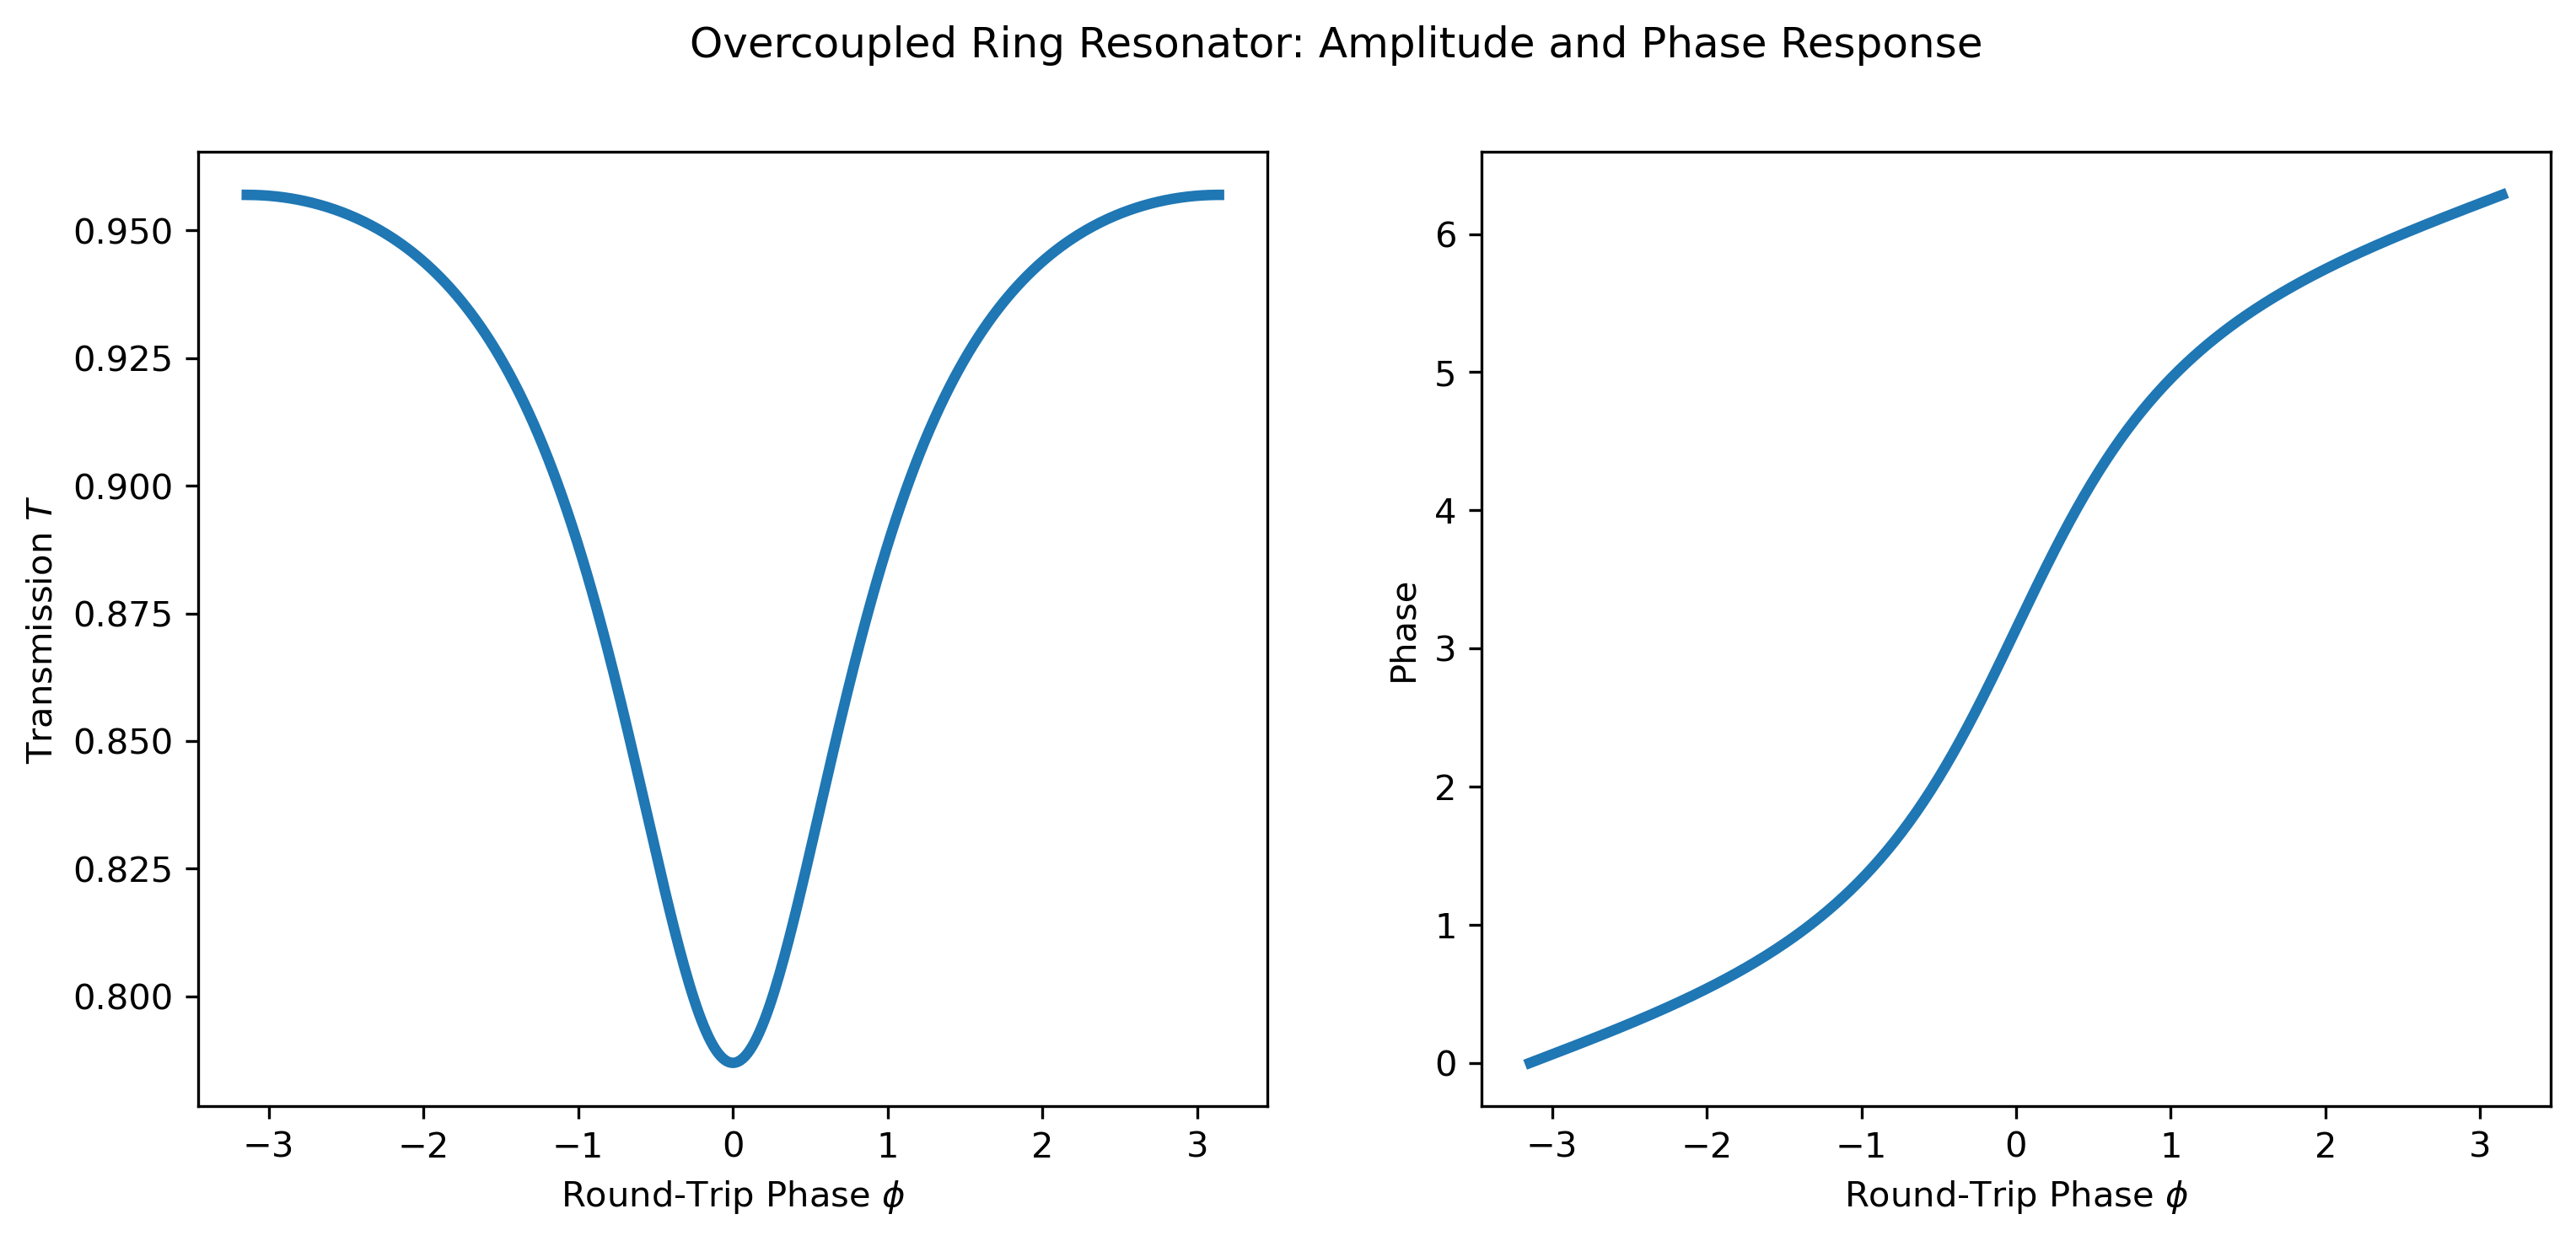

In [112]:
t = 0.4; loss = 0.95

ϕ_list = np.linspace(-π, π, 401)
T = transmission(ϕ_list, t, loss)

fig, ax = plt.subplots(1, 2, figsize = (12, 5), dpi=300)

ax[0].plot(ϕ_list, np.abs(T)**2, '-', linewidth=3)
ax[1].plot(ϕ_list, np.unwrap(np.angle(T)), '-', linewidth=3)

ax[0].set_xlabel(r"Round-Trip Phase $\phi$")
ax[1].set_xlabel(r"Round-Trip Phase $\phi$")
ax[0].set_ylabel(r"Transmission $T$")
ax[1].set_ylabel(r"Phase")

fig.suptitle("Overcoupled Ring Resonator: Amplitude and Phase Response");

### Ring Resonator Lumerical Data

In [54]:
f = h5py.File('resonance.mat','r')
f.keys()

<KeysViewHDF5 ['lum']>

In [80]:
λ = np.array(f['lum']['x0']).flatten() # Wavelengths in nm
T_dB = np.array(f['lum']['y0']).flatten()

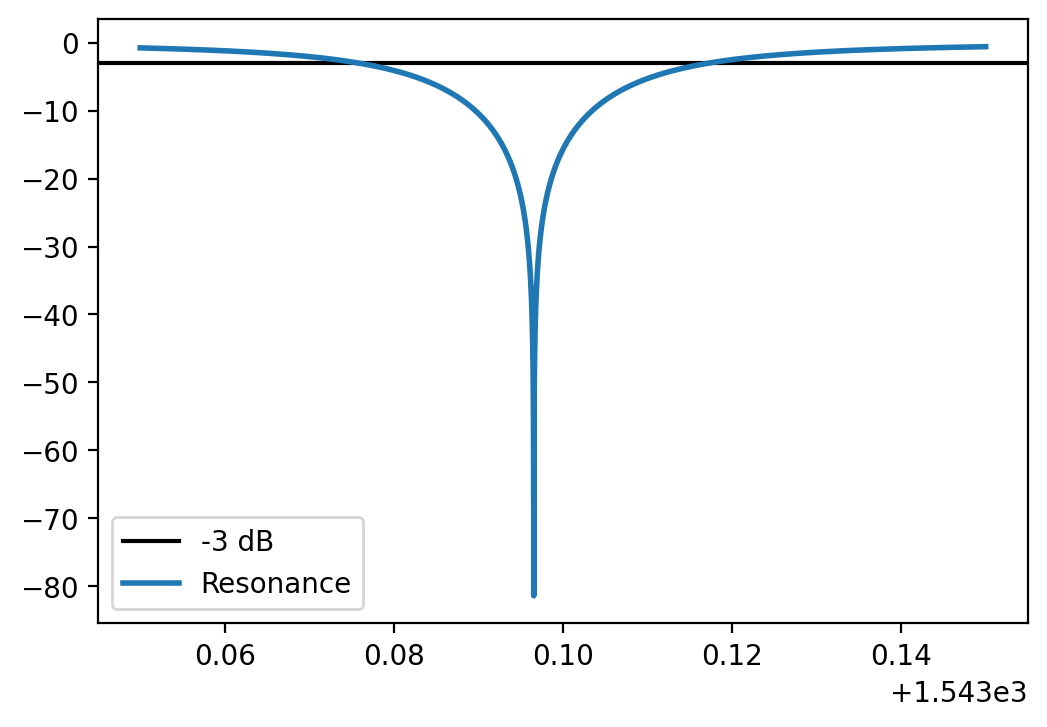

In [101]:
plt.figure(dpi=200)
plt.axhline(-3, color='k', label="-3 dB")
plt.plot(λ, T_dB, linewidth=2,  label="Resonance")
plt.legend()

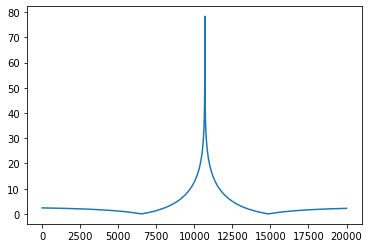

In [102]:
plt.plot(np.abs(T_dB + 3))

In [130]:
# Get the two points closest to -3 dBm
FWHM_dB = - 3


idx1, idx2 = np.argpartition(np.abs(T_dB - FWHM_dB), 2)[:2]

In [131]:
print(T_dB[idx1], T_dB[idx2])

-2.9998570703952856 -2.999555516548541


In [132]:
Δλ = λ[idx1] - λ[idx2]

idx_min = np.argmin(T_dB)
λ0 = λ[idx_min]

In [135]:
print(λ0)
print(Δλ)


np.abs(λ0 / Δλ)

1543.0965483871646
-0.04165481417931005


37044.85492948425